## [2022-01-01] 2주차 MR 요청

## merge request 내역

- merge 요청자: @ljkean 

## 1. 어떤 이유로 MR를 하셨나요?
### merge request할 때, commit한 이유를 리스트에서 체크하고 설명해주세요.
| MR 이유 | 해당 사항 체크(✅,❎) |
| ------ | ------ |
| feature 병합 | ✅ |
| 버그 수정 | ✅ |
| 코드 개선 | ✅ |
| 기존 기능 손상 -> 업데이트 필요 |  |

## 2. 변경 사항이 무엇인가요?

- 프론트엔드 :
- 백엔드 :
  - [api 명세서](https://kdt-gitlab.elice.io/003-part3-ottservice/team1/blackpizza/-/wikis/api%20list)
    - api/contents.py : contents 관련 api
    - api/user.py : user 관련 api
  - ORM model 구성
    - models.py : DB 구조 확인
  - test code
    - test.py : 모든 api에 대한 pytest
    - config.py : test.py의 user test를 위한 test db config 설정 가능
      - 사전 세팅: local에 test db 생성, test.sql 참고 user table 생성 
- 데이터분석 :
  - 데이터 : total_data.csv
    - shape : (19144, 15)
    - columns : '제목', '원제', '개봉일', '스트리밍', '대여', '구매', '평점', '평가수', '장르', '종류', '재생 시간', '감독', '출연진', '시놉시스', '이미지'
    - 수집방법 : [Just Watch](https://www.justwatch.com/kr)에서 selenium을 사용하여 수집

  - 추천 알고리즘
    - 특징 : 장르(액션, 드라마, ...), 종류(영화, TV프로그램), 감독, 출연진, 시놉시스
    - 특징을 Vectorizer를 사용하여 단어의 빈도를 계산하고 cosine_similarity를 사용하여 백터간 거리를 계산
    - TfidfVectorizer : 단순 빈도계산인 Counter Vectorizer와 다르게 관사나, 의미없이 많이 사용되는 단어의 페널티를 주는 TF-IDF 기법을 사용하는 Vectorizer 이다.
    - cosine_similarity : 특징A 특징B의 각도를 계산하여, 특징의 방향이 유사한지를 계산 할 수 있는 유사도 계산식 이다.
    - 추천 우선도 : 평가자수와 평점의 모두 영향을 받는 가중치 평점을 사용하여 우선도를 결정하였다.

## 3. 코치님 코드리뷰 요청사항.

- 프론트엔드 :
- 백엔드 :
  - api/contents/recommend 리뷰
  - test.py 리뷰
- 데이터분석 커밋 :
  - [데이터 분석 README.md](https://kdt-gitlab.elice.io/003-part3-ottservice/team1/blackpizza/-/commit/4806781bb6ecf78a7952698dedd0ccda30791520)
    - 데이터 분석 readme의 틀을 만들었습니다.

In [2]:
print(10)

10


In [4]:
np.array([10])

array([10])

In [2]:
df = pd.DataFrame({'year_month': {
  '2020_01': 7,
  '2020_02': 80,
  '2020_03': 391,
  '2020_04': 156,
  '2020_05': 229,
  '2020_06': 459,
  '2020_07': 281,
  '2020_08': 2415,
  '2020_09': 1306,
  '2020_10': 733,
  '2020_11': 2904,
  '2020_12': 10432,
  '2021_01': 4878,
  '2021_02': 4060,
  '2021_03': 3897,
  '2021_04': 5803,
  '2021_05': 6030,
  '2021_06': 6258,
  '2021_07': 14504,
  '2021_08': 15193,
  '2021_09': 21382,
  '2021_10': 18840,
  '2021_11': 36267,
  '2021_12': 33827}})

In [5]:
df / max(df["year_month"]) * 100

,year_month
2020_01,0.019301
2020_02,0.220586
2020_03,1.078115
2020_04,0.430143
2020_05,0.631428
2020_06,1.265613
2020_07,0.774809
2020_08,6.658946
2020_09,3.601070
2020_10,2.021121


In [6]:
movie = pd.DataFrame({'year_month': ['2020_1','2020_2','2020_3','2020_4','2020_5','2020_6','2020_7','2020_8','2020_9','2020_10','2020_11','2020_12','2021_1','2021_2'], 
         'count':[11588401, 4942629, 307866, 146076, 220161, 2786453, 4691845, 7377554, 1359285, 3561425, 2868649, 612027, 139399, 680320]})

In [10]:
movie["count"] / max(movie["count"]) * 100

0     100.000000
1      42.651519
2       2.656674
3       1.260536
4       1.899839
5      24.045190
6      40.487424
7      63.663261
8      11.729703
9      30.732670
10     24.754485
11      5.281376
12      1.202918
13      5.870698
Name: count, dtype: float64

In [11]:

netflix = pd.DataFrame({'year_month': ['2020_1','2020_2','2020_3','2020_4','2020_5','2020_6','2020_7','2020_8','2020_9','2020_10','2020_11','2020_12','2021_1','2021_2'], 
         'count':[4704524, 5012431, 5813026, 7109803, 7390568, 7040598, 7205743, 7816590, 7857064, 7898026, 7604538, 8840698, 9806897, 10013283]})

In [13]:
netflix

,year_month,count
0,2020_1,4704524
1,2020_2,5012431
2,2020_3,5813026
3,2020_4,7109803
4,2020_5,7390568
5,2020_6,7040598
6,2020_7,7205743
7,2020_8,7816590
8,2020_9,7857064
9,2020_10,7898026


In [21]:
(netflix["count"] - min(netflix["count"])) / max((netflix["count"] - min(netflix["count"]))) * 100

0       0.000000
1       5.799981
2      20.880624
3      45.307745
4      50.596458
5      44.004145
6      47.114947
7      58.621346
8      59.383747
9      60.155340
10     54.626966
11     77.912258
12     96.112349
13    100.000000
Name: count, dtype: float64

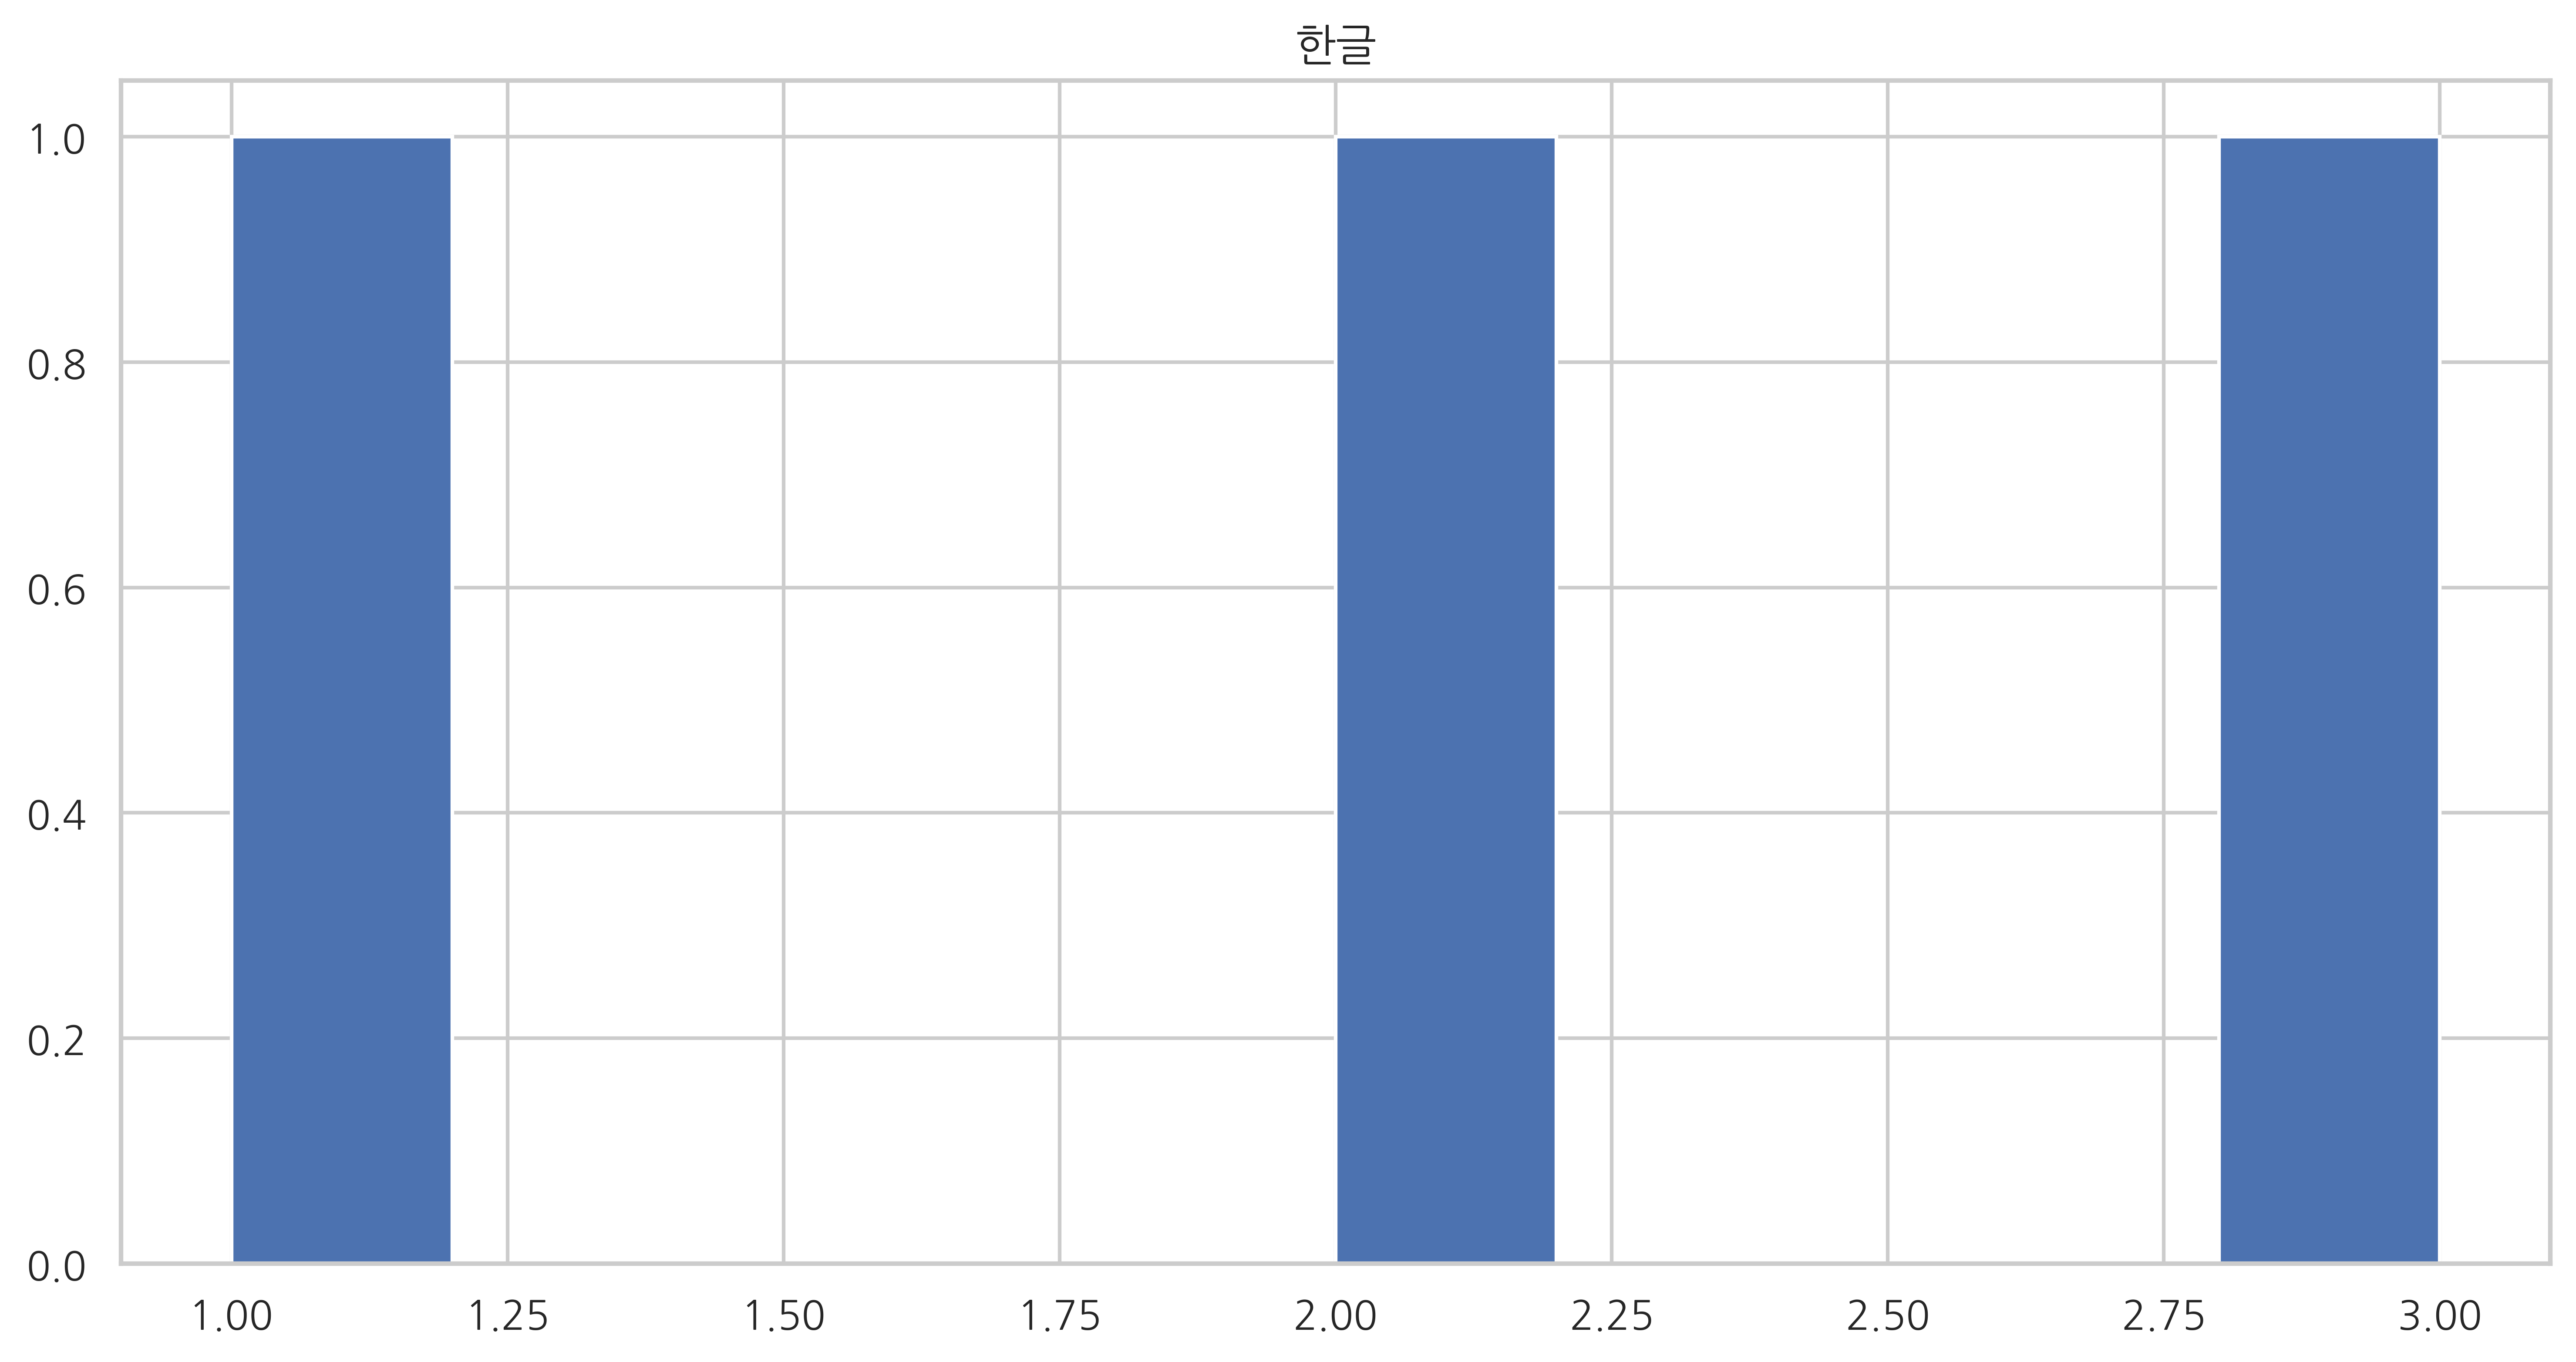

In [8]:
plt.hist([1, 2, 3])
plt.title("한글")
plt.show()

In [2]:
plt.bar([1,2,3],[1,2,3])
plt.show()

In [1]:
import numpy as np

array = np.arange(8)

In [3]:
array.reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [17]:
arr = np.array(["1", "1", "2", "3", "2", "2"])

In [12]:
set(arr)

{'1', '2', '3'}

In [14]:
arr[arr == "1"]

array(['1', '1'], dtype='<U1')

In [24]:
# 지시사항을 참고하여 코드를 작성하세요.
def vote(data):
    arr = np.array(data)
    data = set(arr)
    max_num = None
    max_count = 0
    for d in data:
        if len(arr[arr == d]) > max_count:
            max_count = len(arr[arr == d])
            max_num = d
    
    return str(max_num)

# 값을 확인하기 위한 코드입니다. 값을 변경해가며 테스트해 보세요!
print(vote(["A", "B", "A", "A", "C", "C", "C", "C"]))

C


In [19]:
max_num

'1'